In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Load data hasil Day 2
merged = pd.read_csv("merged_data.csv")
merged['Date'] = pd.to_datetime(merged['Date'])


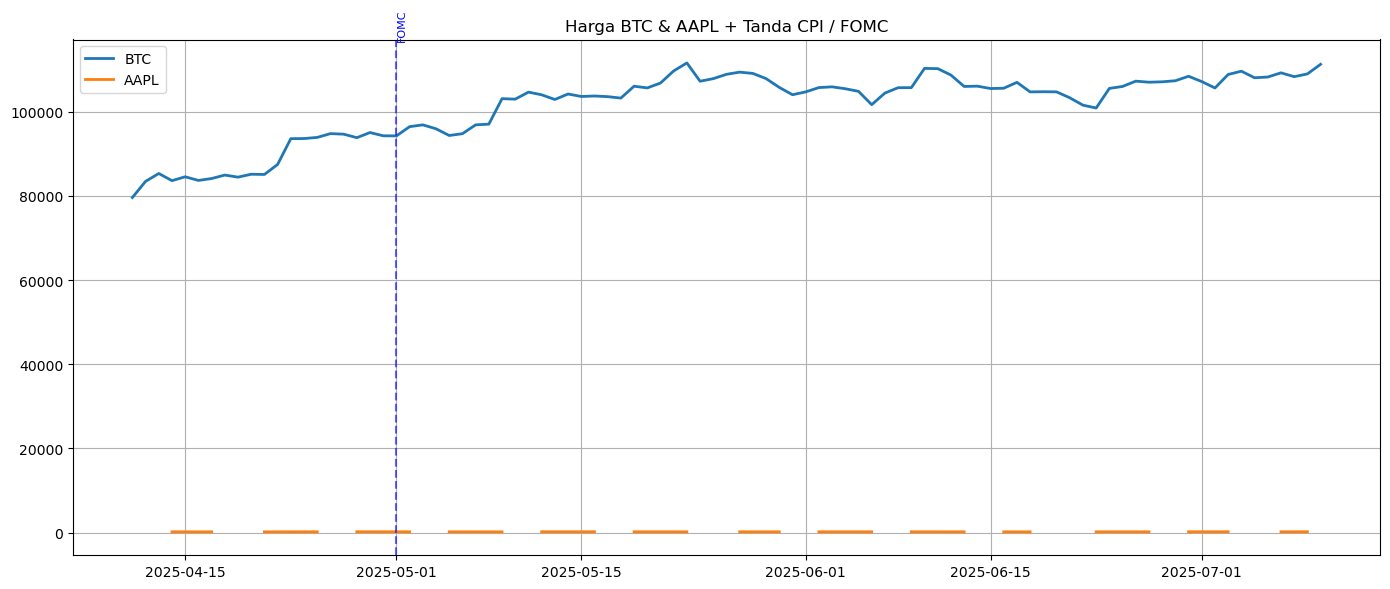

In [2]:
# Filter data 90 hari terakhir
recent = merged[merged['Date'] >= merged['Date'].max() - pd.Timedelta(days=90)]

# Buat list event
events = recent[recent['is_event_day'] == True][['Date', 'Event']]

# Buat line chart
plt.figure(figsize=(14, 6))
plt.plot(recent['Date'], recent['BTC'], label='BTC', linewidth=2)
plt.plot(recent['Date'], recent['AAPL'], label='AAPL', linewidth=2)

# Tandai event
for i, row in events.iterrows():
    plt.axvline(row['Date'], color='red' if row['Event'] == 'CPI' else 'blue', linestyle='--', alpha=0.6)
    plt.text(row['Date'], plt.ylim()[1], row['Event'], rotation=90, fontsize=8, color='red' if row['Event'] == 'CPI' else 'blue')

plt.title("Harga BTC & AAPL + Tanda CPI / FOMC")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


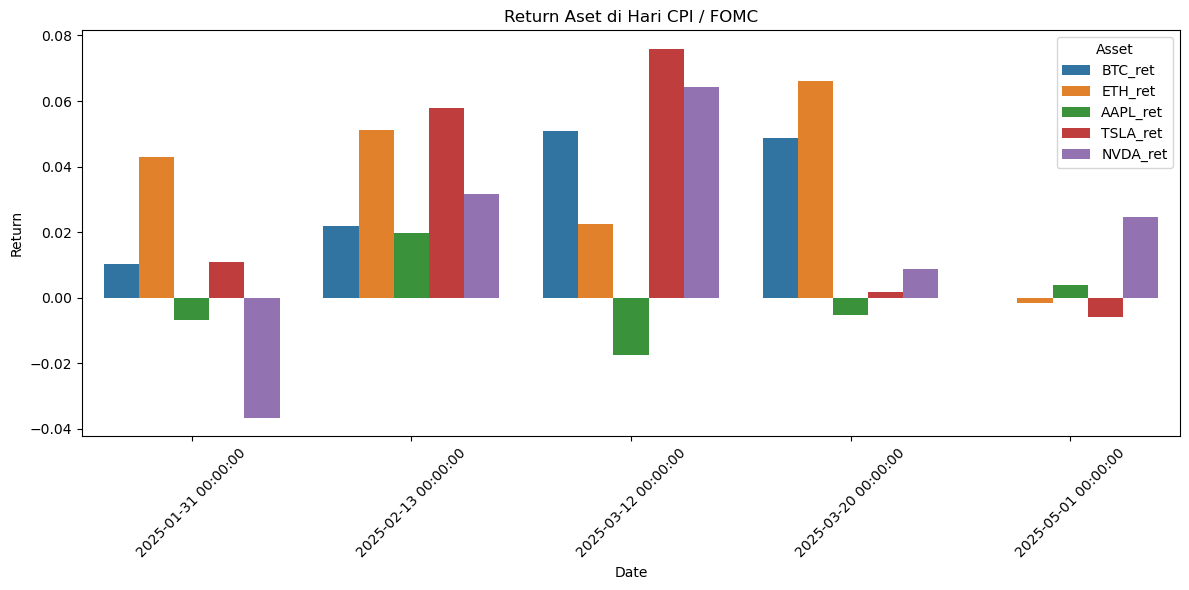

In [3]:
# Ambil hanya hari event dan return-nya
ret_cols = ['BTC_ret', 'ETH_ret', 'AAPL_ret', 'TSLA_ret', 'NVDA_ret']
event_returns = merged[merged['is_event_day']][['Date', 'Event'] + ret_cols]

# Plot barplot return
plt.figure(figsize=(12, 6))
sns.barplot(data=event_returns.melt(id_vars=['Date', 'Event'], var_name='Asset', value_name='Return'),
            x='Date', y='Return', hue='Asset')
plt.title("Return Aset di Hari CPI / FOMC")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


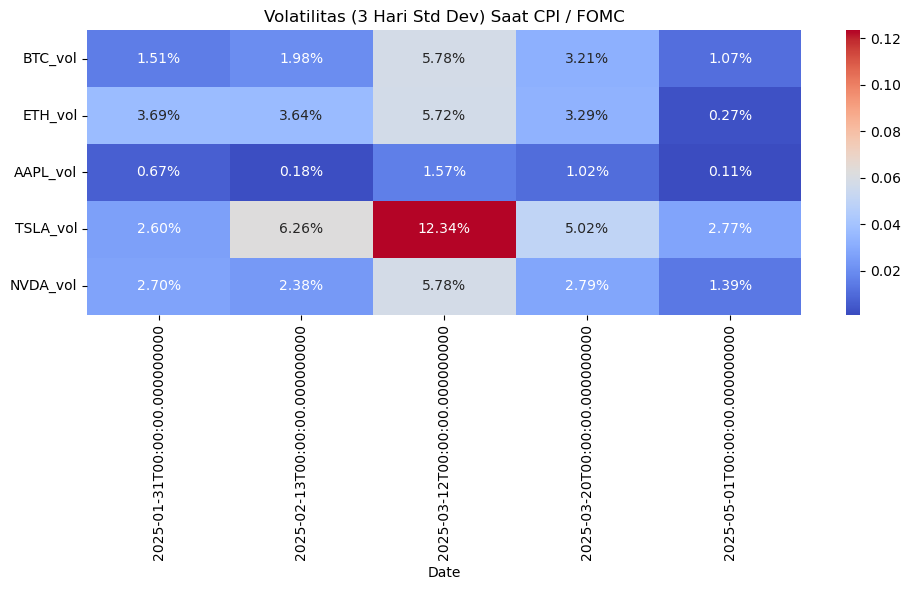

In [4]:
# Ambil volatilitas saat event
vol_cols = ['BTC_vol', 'ETH_vol', 'AAPL_vol', 'TSLA_vol', 'NVDA_vol']
event_vol = merged[merged['is_event_day']][['Date', 'Event'] + vol_cols].set_index('Date')

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(event_vol[vol_cols].T, cmap='coolwarm', annot=True, fmt=".2%")
plt.title("Volatilitas (3 Hari Std Dev) Saat CPI / FOMC")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
